In [45]:
from sklearn.datasets import load_iris
import pandas as pd
iris =  load_iris()
iris = pd.DataFrame(data= iris.data, columns= iris.feature_names)

In [46]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
## standadizatioin
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data=scalar.fit_transform(iris)

In [48]:
## appliying PCA for 4D->2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df=pca.fit_transform(scaled_data)

In [49]:
df

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

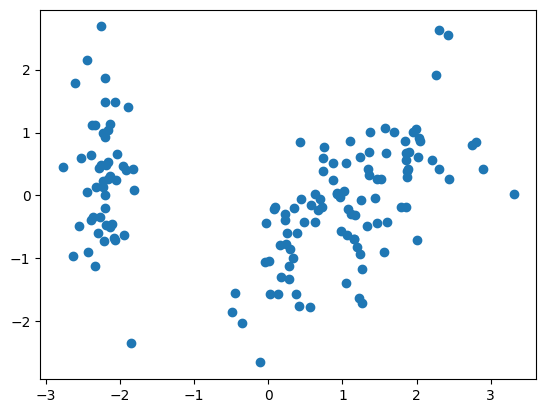

In [50]:
plt.scatter(df[:,0],df[:,1])

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [102.5, 102.5, 146.25, 146.25],
  [54.375, 54.375, 124.375, 124.375],
  [22.5, 22.5, 89.375, 89.375],
  [5.0, 5.0, 55.9375, 55.9375],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [205.0, 205.0, 223.75, 223.75],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [255.0, 255.0, 280.0, 280.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [312.5, 31

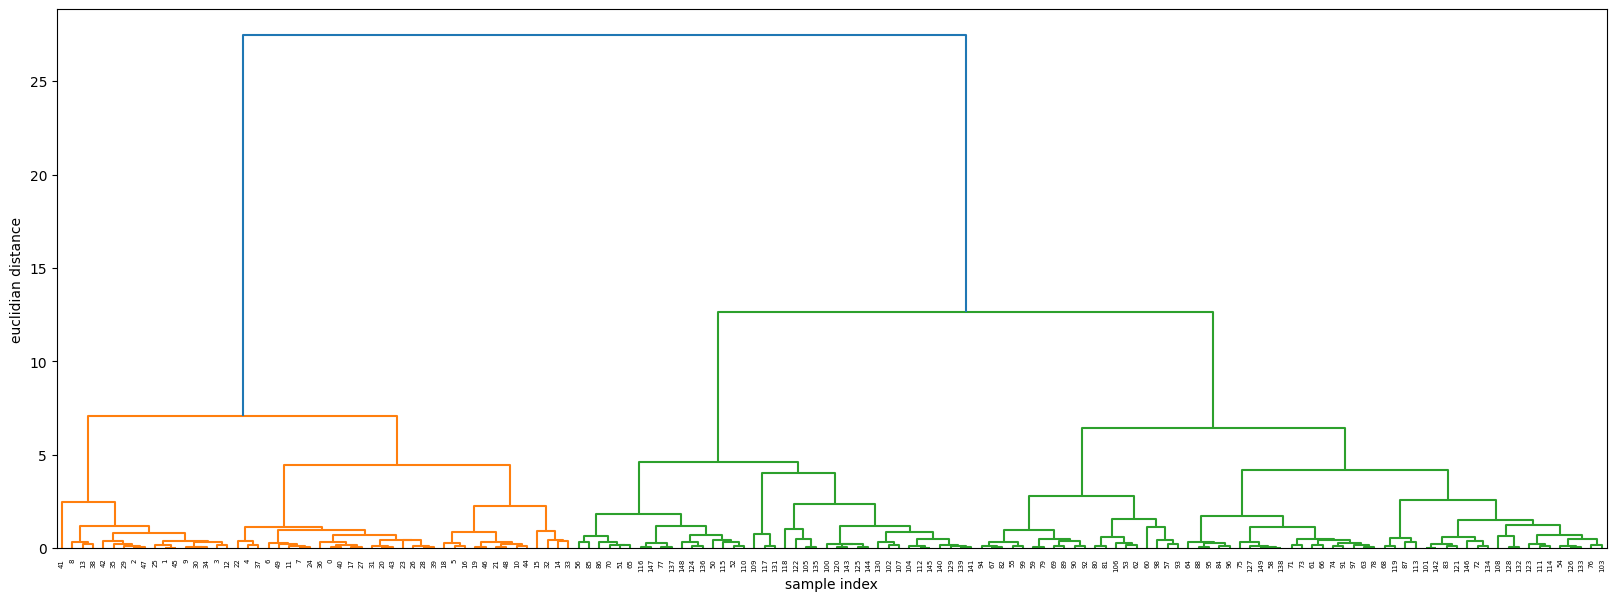

In [51]:
## constructing the dendogram
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))

import scipy.cluster.hierarchy as sc
plt.xlabel('sample index')
plt.ylabel('euclidian distance')
sc.dendrogram(sc.linkage(df,method='ward'))

In [52]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')

In [53]:
cluster.fit(df)

AgglomerativeClustering()

In [54]:
from sklearn.metrics import silhouette_score
silhouette_score(df,cluster.labels_)

np.float64(0.6145202036230452)

In [60]:
score = []
for k in range(2,110):
    cluster2 = AgglomerativeClustering(n_clusters=k,linkage='ward')
    cluster2.fit(df)
    pscore= silhouette_score(df,cluster2.labels_)
    score.append(pscore)

In [61]:
score

[np.float64(0.6145202036230452),
 np.float64(0.511059598876619),
 np.float64(0.4487350420958893),
 np.float64(0.4041689631006267),
 np.float64(0.3672112889583074),
 np.float64(0.3706820678912666),
 np.float64(0.3930552606912111),
 np.float64(0.4183694466469872),
 np.float64(0.405420562888949),
 np.float64(0.4186013055689468),
 np.float64(0.4245439335349703),
 np.float64(0.4219015636274055),
 np.float64(0.4204014046804573),
 np.float64(0.41550584948772845),
 np.float64(0.40960273279110154),
 np.float64(0.4112467957923599),
 np.float64(0.4164343599831439),
 np.float64(0.4184452295251125),
 np.float64(0.4042261669599517),
 np.float64(0.4038190697095197),
 np.float64(0.40250352027192826),
 np.float64(0.4087901632959538),
 np.float64(0.3954000948642271),
 np.float64(0.3978925010175579),
 np.float64(0.3970378323099578),
 np.float64(0.3993447130563816),
 np.float64(0.3898411288809678),
 np.float64(0.3853406995474085),
 np.float64(0.3957848132059184),
 np.float64(0.39993192719301496),
 np.floa

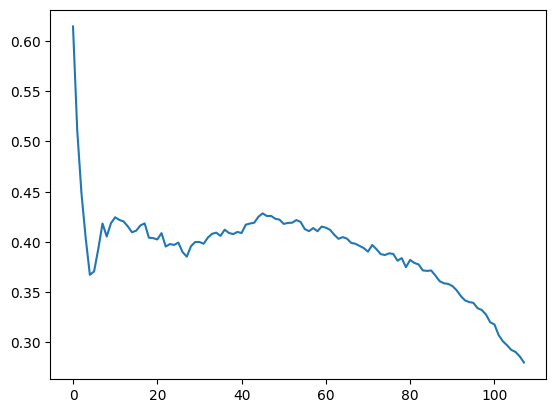

In [62]:
plt.plot(score)

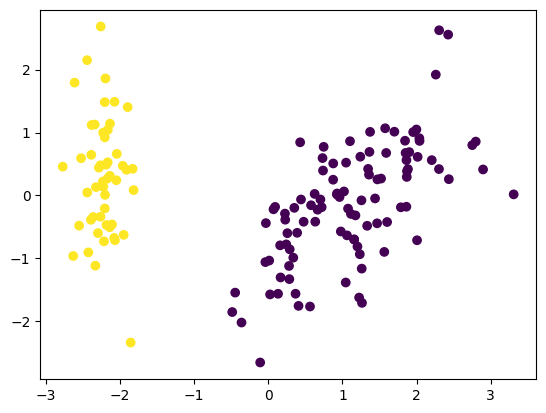

In [58]:
plt.scatter(df[:,0],df[:,1],c=cluster.labels_)